<a href="https://colab.research.google.com/github/YassinDhaya/Prediction-of-Product-Sales/blob/main/Prediction_of_Product_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction of Product Sales

- Author: Yassine Dhaya

## Project Overview

The project will be a sales prediction for food items sold at various stores. The goal of this is to help the retailer understand the properties of products and outlets that play crucial roles in increasing sales.

## Load and Inspect Data

In [1]:
# Import required packages
import pandas as pd
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Save the filepath and load the data as "df"
path = '/content/drive/MyDrive/CodingDojo/01-Fundamentals/Week02/Data/sales_predictions_2023.csv'
df = pd.read_csv(path)

In [3]:
# Display the info for the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [4]:
# Display the first 5 rows
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Clean Data

#### How many rows/columns:

In [5]:
df.shape

(8523, 12)



*   there are `8523` rows and `12` columns


#### Checking the data types:

In [6]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

#### ckecking duplicates

In [7]:
# Save a filter called "duplicated_rows" that identifies duplicated rows
duplicated_rows = df.duplicated()

# Get the sum of duplicated_rows filter to see the number of duplicate rows
duplicated_rows.sum()

0



*   There is no duplicates



#### Missing values


In [8]:
# Get the number of null values for all columns and save as a variable
null_sum = df.isna().sum()
null_sum

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [9]:
# Use this result to calculate the percentage of null values for each column.
null_percent =(df.isna().sum() / len(df) * 100).round(2)
null_percent

Item_Identifier               0.00
Item_Weight                  17.17
Item_Fat_Content              0.00
Item_Visibility               0.00
Item_Type                     0.00
Item_MRP                      0.00
Outlet_Identifier             0.00
Outlet_Establishment_Year     0.00
Outlet_Size                  28.28
Outlet_Location_Type          0.00
Outlet_Type                   0.00
Item_Outlet_Sales             0.00
dtype: float64

<Axes: >

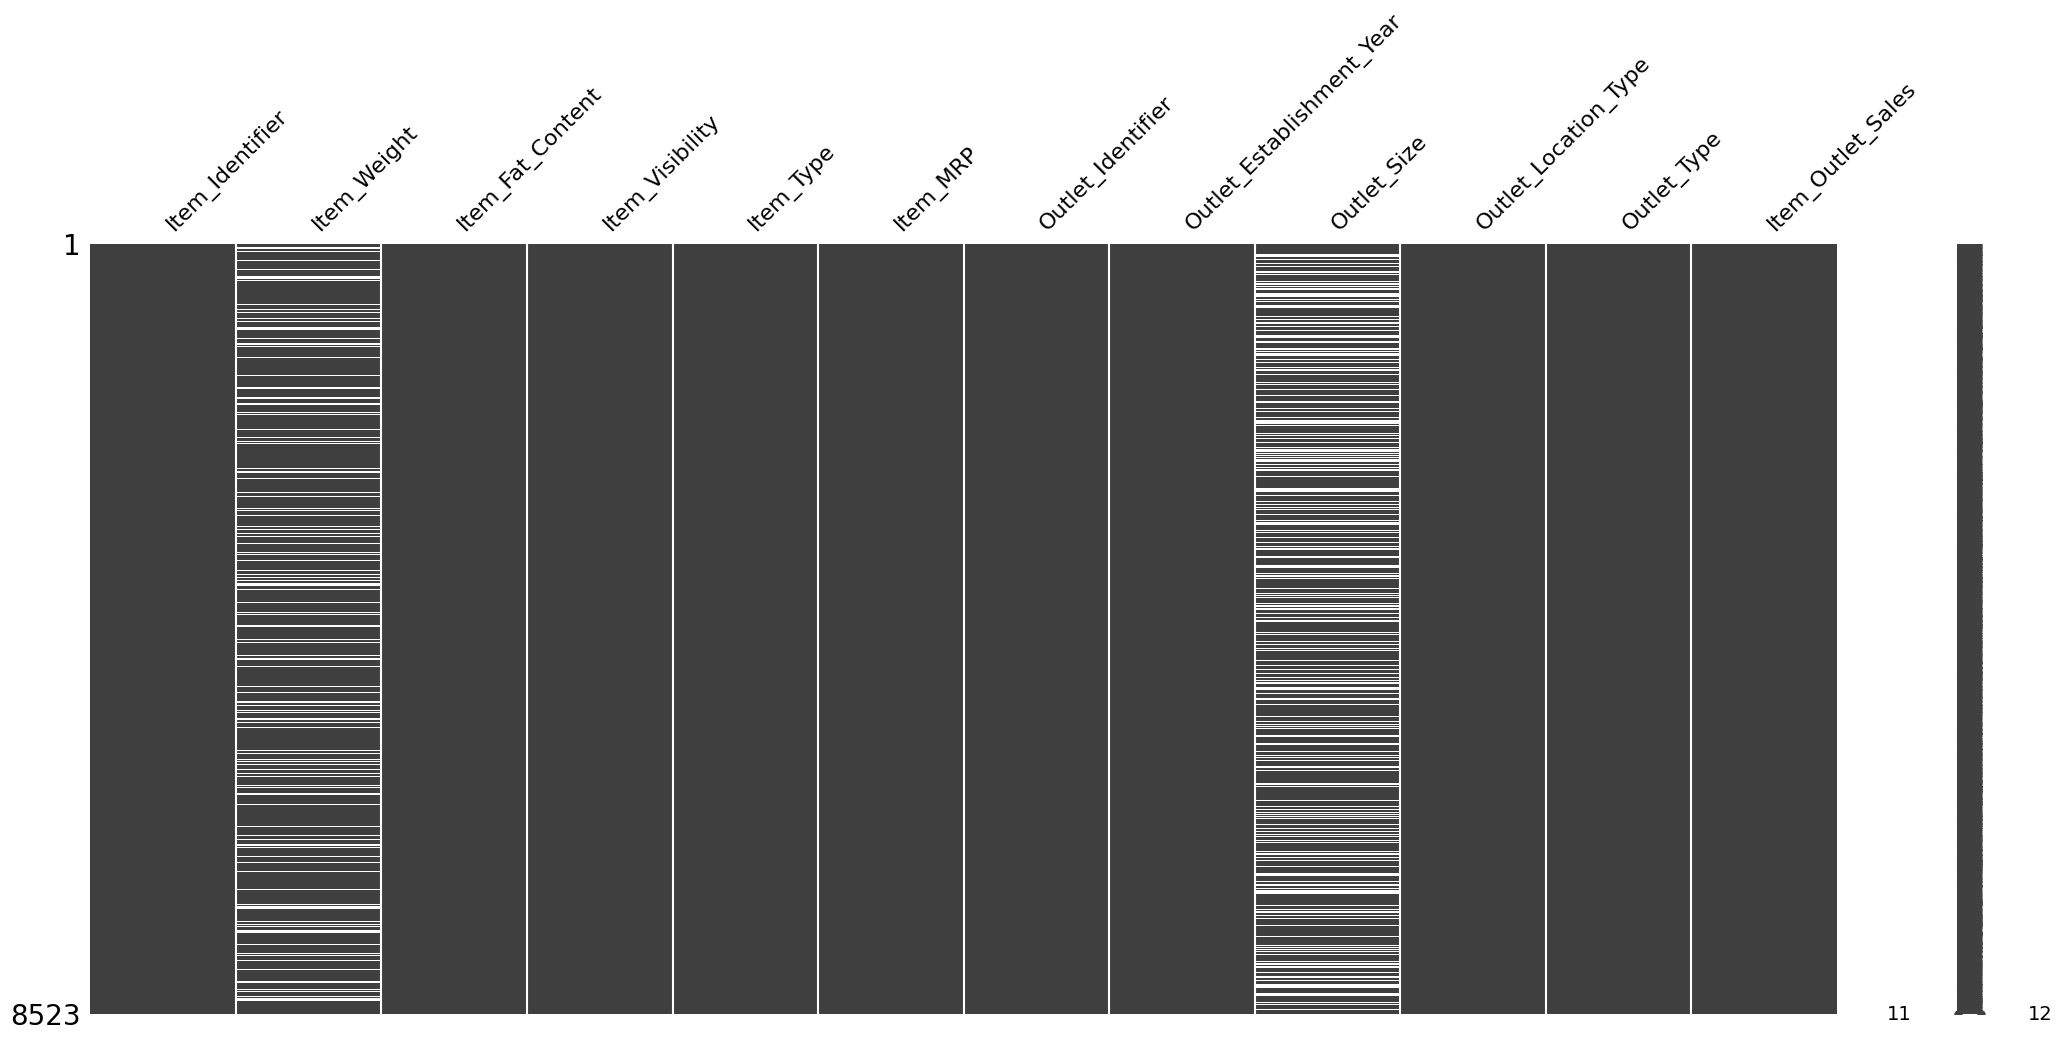

In [10]:
# Visualize the missing values using the missingno package's matrix plot.
import missingno as msno
msno.matrix(df)

##### Address the null values:

- Fill the null values in categorical column with a placeholder category called MISSING.

In [11]:
# save list of categorical column name. (Hint: select_dtypes)
cat_cols = df.select_dtypes('object').columns
cat_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [12]:
# use the list of cat columns to fill null values with MISSING
# df[cat_cols] = df[cat_cols].fillna('MISSING')

---


- Fill the null values in numeric column with a placeholder value of -1

In [13]:
# save list of numeric column names (Hint: select_dtypes)
num_cols = df.select_dtypes('number').columns
num_cols

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

In [14]:
# use the list of num columns to fill null values with -1
# df[num_cols] = df[num_cols].fillna(-1)

- Use Pandas to confirm that there are 0 null values remaining.


In [15]:
# Confirm no more nulls using Pandas
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

#### Consistent Values

- Check each string column's value counts for inconsistent values.

In [16]:
# Save a list of object columns
obj_cols = df.select_dtypes('object').columns
obj_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [17]:
# Check the nunique for just the object cols
df[obj_cols].nunique()

Item_Identifier         1559
Item_Fat_Content           5
Item_Type                 16
Outlet_Identifier         10
Outlet_Size                3
Outlet_Location_Type       3
Outlet_Type                4
dtype: int64

##### For Each Remaining Categorical Column:

- Display the value counts for the column
- Take a note of any values that are not consistent.
- Remove/fix the inconsistent values
- Confirm by checking the value counts again

In [18]:
# loop through the list of string columns
for i in obj_cols:
  v = df[i].value_counts()
  # print the value counts for the column
  print(f'The value count of {i} is\n{v}')
  # Print an empty line for readability
  print('\n')

The value count of Item_Identifier is
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64


The value count of Item_Fat_Content is
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


The value count of Item_Type is
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


The value count of Outlet_Identifier is
OUT027    935
OUT013    932
OUT049  

- Item_Fat_Content is inconsistant

In [38]:
# Standardize the values in the column
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'low fat':"Low Fat",'LF':'Low Fat', 'reg':"Regular"})
df['Item_Fat_Content'].value_counts()



Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

#### Statistics on numerical columns

In [19]:
# Save a list of object columns
numu_cols = df.select_dtypes('object').columns
num_cols

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

In [20]:
import numpy as np
for num in num_cols:
  print(f'Statistics of {num}:\nMin is equal to {df[num].min().round(3)}\nMax is equal to {df[num].max().round(3)}\nMean is equal to {np.mean(df[num]).round(3)} ')
  print('\n')

Statistics of Item_Weight:
Min is equal to 4.555
Max is equal to 21.35
Mean is equal to 12.858 


Statistics of Item_Visibility:
Min is equal to 0.0
Max is equal to 0.328
Mean is equal to 0.066 


Statistics of Item_MRP:
Min is equal to 31.29
Max is equal to 266.888
Mean is equal to 140.993 


Statistics of Outlet_Establishment_Year:
Min is equal to 1985
Max is equal to 2009
Mean is equal to 1997.832 


Statistics of Item_Outlet_Sales:
Min is equal to 33.29
Max is equal to 13086.965
Mean is equal to 2181.289 




- **Warning: the placeholder values we put instead of missing values affected the statistical findings**

## Exploratory Data Analysis

### Univariate Exploratory Data Analysis

#### EDA for categorical features

<ipython-input-21-a41e0f7da1f3>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  p3.set_xticklabels(p3.get_xticklabels(), rotation=45);
<ipython-input-21-a41e0f7da1f3>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  p3.set_xticklabels(p3.get_xticklabels(), rotation=45);
<ipython-input-21-a41e0f7da1f3>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  p3.set_xticklabels(p3.get_xticklabels(), rotation=45);
<ipython-input-21-a41e0f7da1f3>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  p3.set_xticklabels(p3.get_xticklabels(), rotation=45);
<ipython-input-21-a41e0f7da1f3>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  p3.set_xticklabels(p3.get_xticklabels(), rotation=45);
<ipython-input-21-a41e0f7da1f3>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  p3.set_xticklabels(p3.get_xticklabels(), rotati

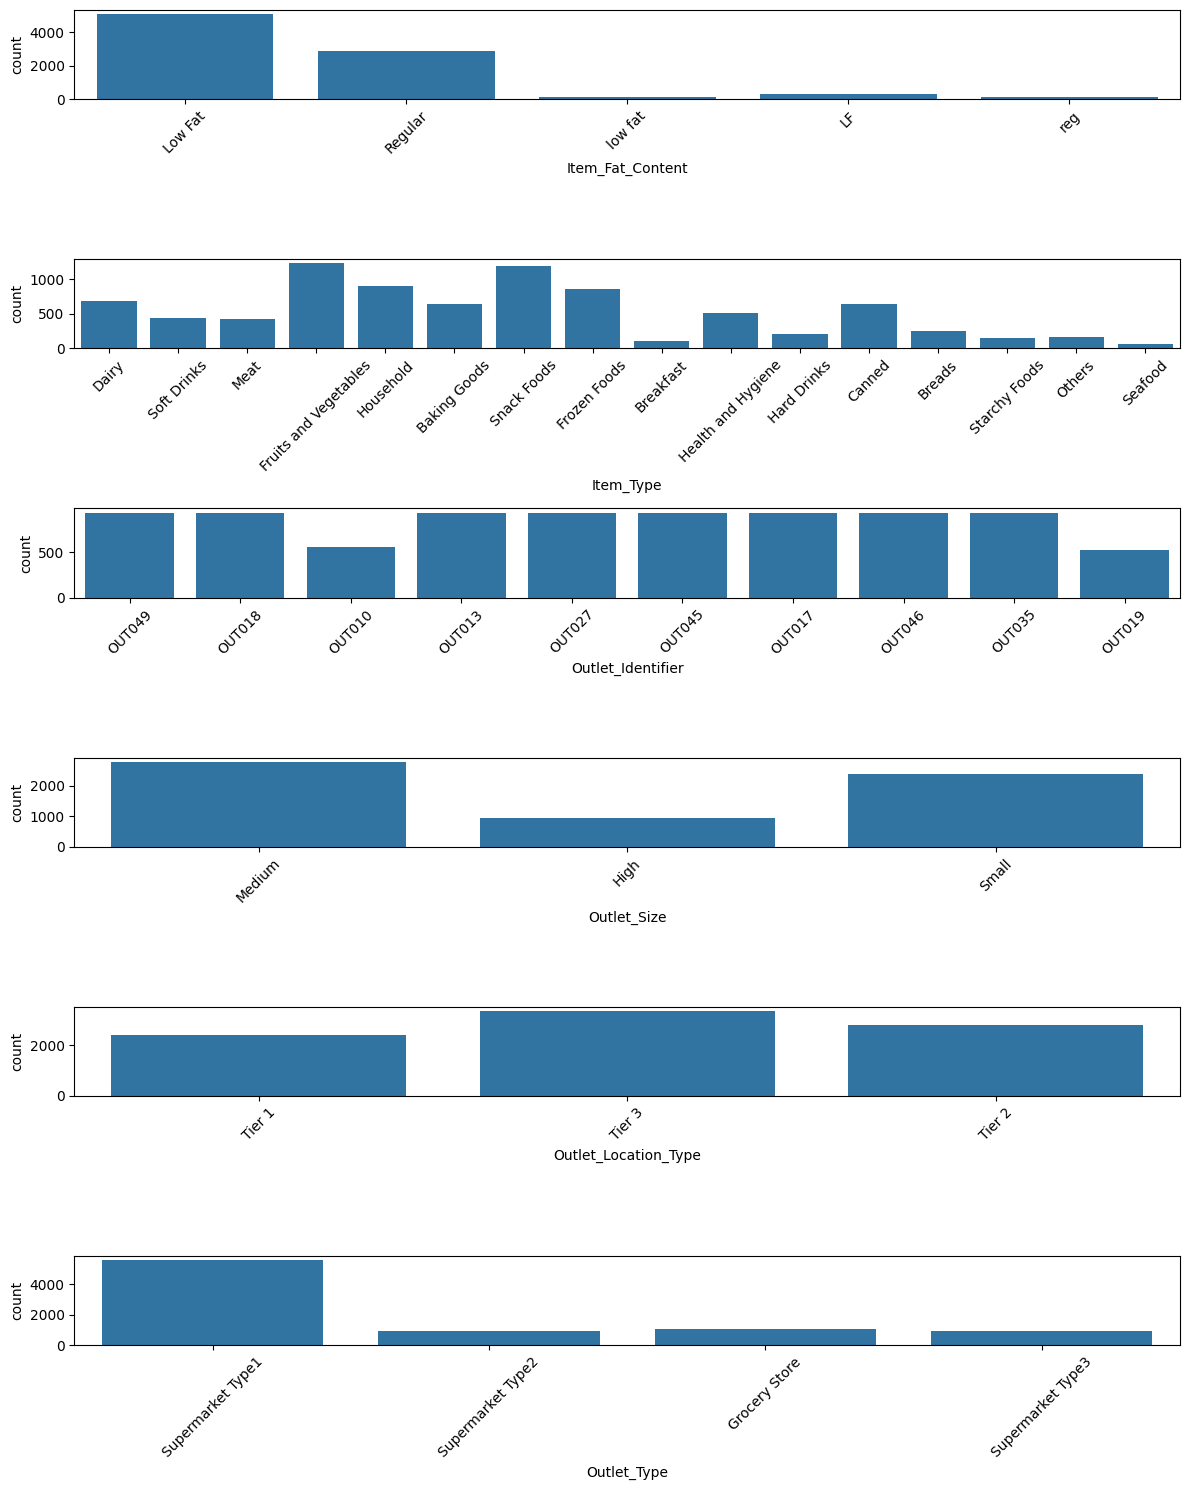

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
# Assuming you have your DataFrame `df1` already prepared
df2= df[cat_cols].drop(columns= ['Item_Identifier'])
cat_cols_len = len(df2.columns)
# Create subplots efficiently using `subplots_adjust`
fig, axes = plt.subplots(nrows=len(df2.columns), ncols=1, figsize=(12,15))  # Adjust figsize as needed

# Iterate through columns and create boxplots on respective axes
for i, col in enumerate(df2.columns):
    p3 = sns.countplot(data=df2, x=col, ax=axes[i])  # Use axes[i] for direct assignment
    p3.set_xticklabels(p3.get_xticklabels(), rotation=45);

plt.tight_layout();  # Adjust spacing between subplots

# Display the plot
plt.show();

#### EDA for numerical features

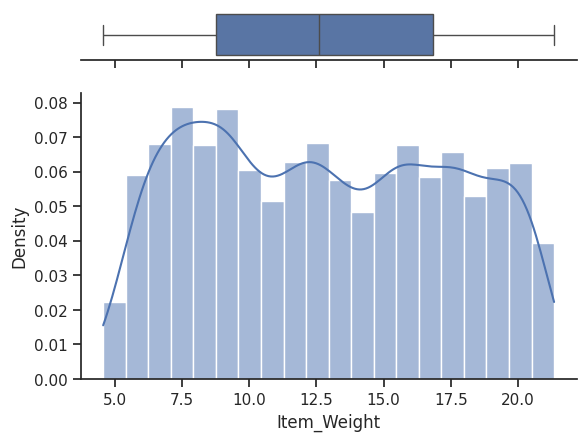

In [22]:
sns.set(style="ticks")


f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

sns.boxplot(x=df['Item_Weight'], ax=ax_box)
sns.histplot(x=df['Item_Weight'], bins='auto', kde=True, stat='density', ax=ax_hist)

ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)

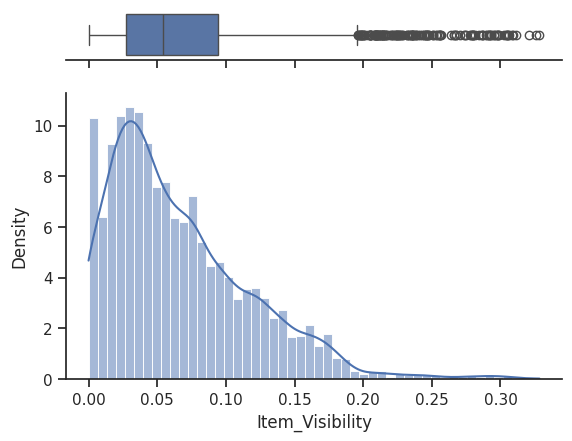

In [23]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

sns.boxplot(x=df['Item_Visibility'], ax=ax_box)
sns.histplot(x=df['Item_Visibility'], bins='auto', kde=True, stat='density', ax=ax_hist)

ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)

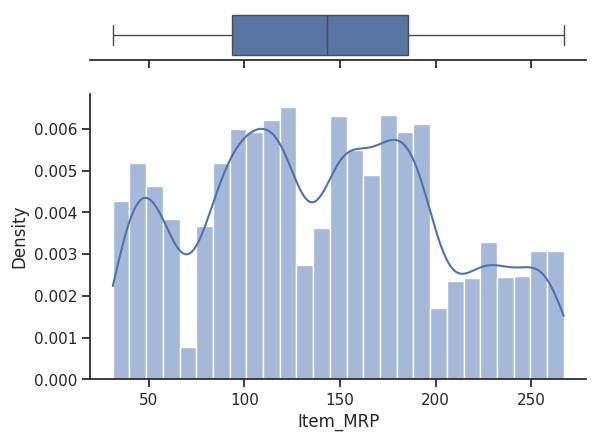

In [24]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

sns.boxplot(x=df['Item_MRP'], ax=ax_box)
sns.histplot(x=df['Item_MRP'], bins='auto', kde=True, stat='density', ax=ax_hist)

ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)

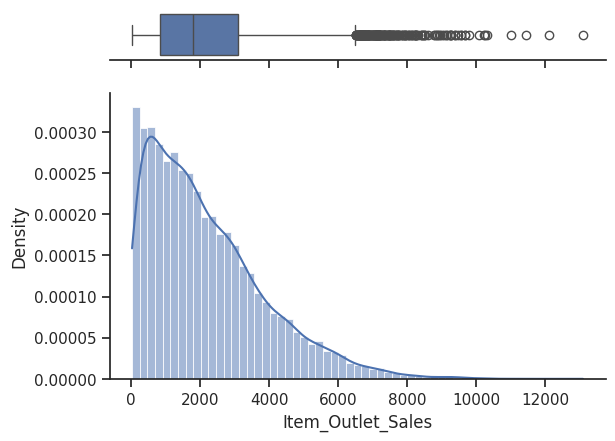

In [25]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

sns.boxplot(x=df['Item_Outlet_Sales'], ax=ax_box)
sns.histplot(x=df['Item_Outlet_Sales'], bins='auto', kde=True, stat='density', ax=ax_hist)

ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)

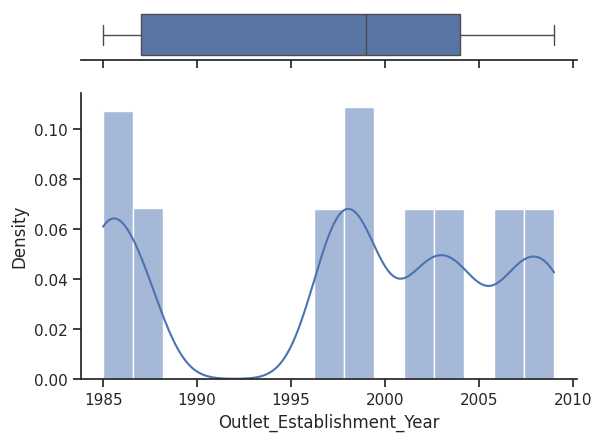

In [26]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

sns.boxplot(x=df['Outlet_Establishment_Year'], ax=ax_box)
sns.histplot(x=df['Outlet_Establishment_Year'], bins='auto', kde=True, stat='density', ax=ax_hist)

ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)

### Multivariate Explanatory Data Analysis

In [27]:
# Get correlations
corr = df.corr(numeric_only = True)

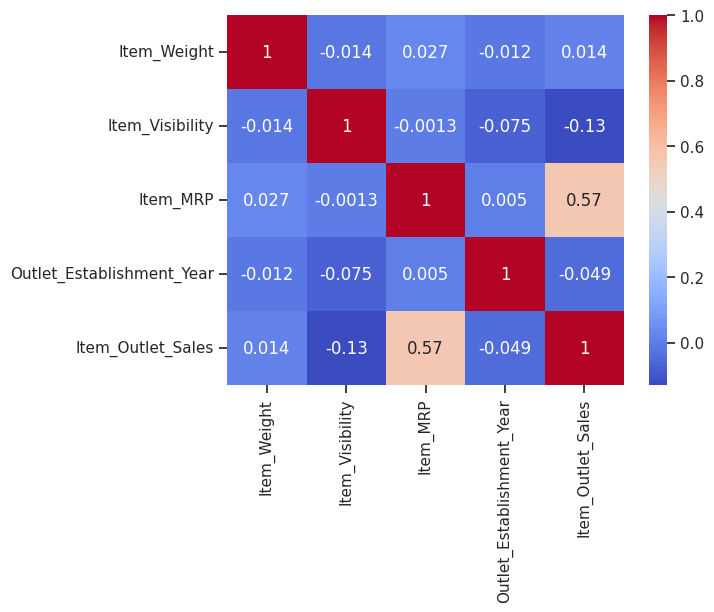

In [28]:
# Create a fig, ax with a figsize argument
sns.heatmap(corr, cmap = 'coolwarm', annot = True);

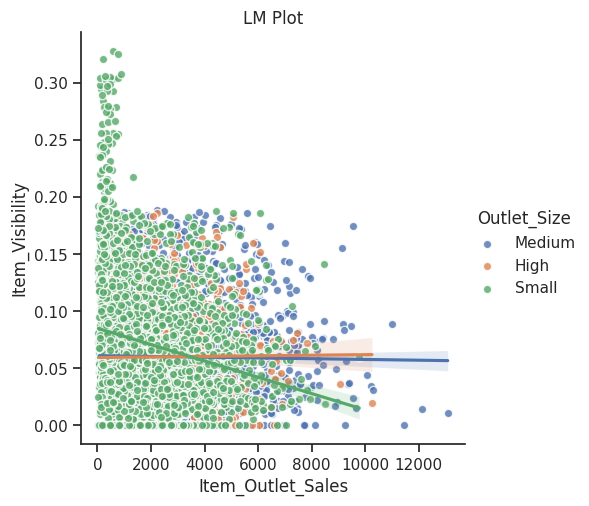

In [29]:
# Set the title using g.ax.set_title()
scatter_kws = dict(edgecolor='white')
g = sns.lmplot(data=df, x="Item_Outlet_Sales", y="Item_Visibility",
               scatter_kws=scatter_kws,
                hue="Outlet_Size");
g.ax.set_title("LM Plot");

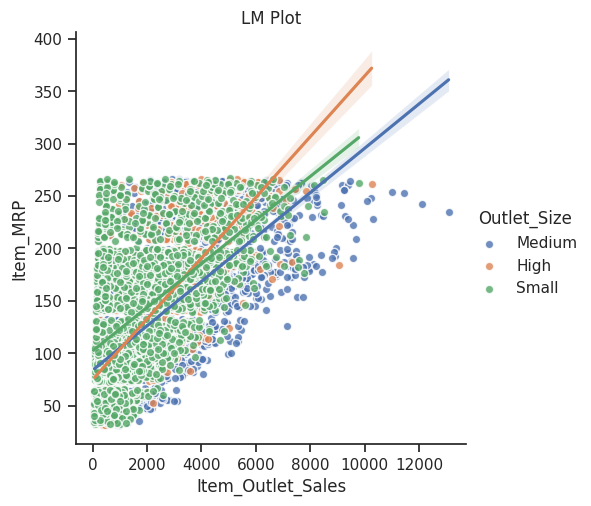

In [30]:
g = sns.lmplot(data=df, x="Item_Outlet_Sales", y="Item_MRP",
               scatter_kws=scatter_kws,
                hue="Outlet_Size");
g.ax.set_title("LM Plot");

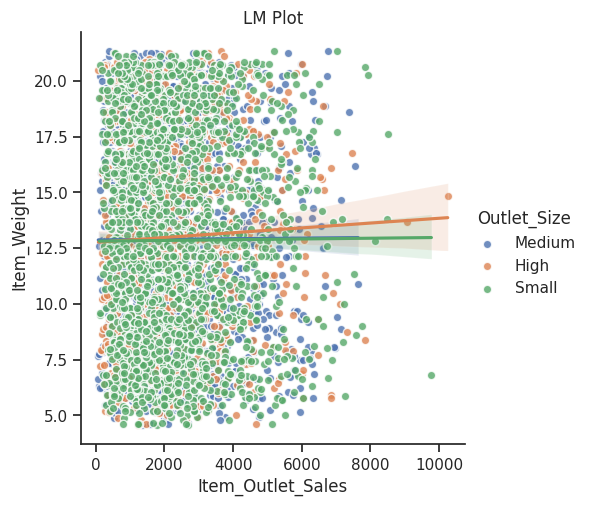

In [31]:
g = sns.lmplot(data=df, x="Item_Outlet_Sales", y="Item_Weight",
               scatter_kws=scatter_kws,
                hue="Outlet_Size");
g.ax.set_title("LM Plot");

## Feature Inspection

### EDA Functions

In [32]:
"""UNIVARIATE PLOTTING FUNCTIONS FOR EDA"""
# Add the print statements to the function
def explore_categorical(df, x, fillna = True, placeholder = 'MISSING',
                        figsize = (6,4), order = None):
  """Creates a seaborn countplot with the option to temporarily fill missing values
  Prints statements about null values, cardinality, and checks for
  constant/quasi-constant features.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # Before filling nulls, save null value counts and percent for printing
  null_count = temp_df[x].isna().sum()
  null_perc = null_count/len(temp_df)* 100
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)
  # Create figure with desired figsize
  fig, ax = plt.subplots(figsize=figsize)
  # Plotting a count plot
  sns.countplot(data=temp_df, x=x, ax=ax, order=order)
  # Rotate Tick Labels for long names
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
  # Add a title with the feature name included
  ax.set_title(f"Column: {x}", fontweight='bold')

  # Fix layout and show plot (before print statements)
  fig.tight_layout()
  plt.show()

  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = temp_df[x].nunique()
  print(f"- Unique Values: {nunique}")
  # First find value counts of feature
  val_counts = temp_df[x].value_counts(dropna=False)
  # Define the most common value
  most_common_val = val_counts.index[0]
  # Define the frequency of the most common value
  freq = val_counts.values[0]
  # Calculate the percentage of the most common value
  perc_most_common = freq / len(temp_df) * 100
  # Print the results
  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")
  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, ax


# TO DO: add the new print statements from explore_categorical
def explore_numeric(df, x, figsize=(6,5) ):
  """Creates a seaborn histplot and boxplot with a share x-axis,
  Prints statements about null values, cardinality, and checks for
  constant/quasi-constant features.
  Source:{PASTE IN FINAL LESSON LINK}
  """

  ## Save null value counts and percent for printing
  null_count = df[x].isna().sum()
  null_perc = null_count/len(df)* 100


  ## Making our figure with gridspec for subplots
  gridspec = {'height_ratios':[0.7,0.3]}
  fig, axes = plt.subplots(nrows=2, figsize=figsize,
                           sharex=True, gridspec_kw=gridspec)
  # Histogram on Top
  sns.histplot(data=df, x=x, ax=axes[0])

  # Boxplot on Bottom
  sns.boxplot(data=df, x=x, ax=axes[1])

  ## Adding a title
  axes[0].set_title(f"Column: {x}", fontweight='bold')

  ## Adjusting subplots to best fill Figure
  fig.tight_layout()

  # Ensure plot is shown before message
  plt.show()


  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = df[x].nunique()
  print(f"- Unique Values: {nunique}")


  # Get the most most common value, its count as # and as %
  most_common_val_count = df[x].value_counts(dropna=False).head(1)
  most_common_val = most_common_val_count.index[0]
  freq = most_common_val_count.values[0]
  perc_most_common = freq / len(df) * 100

  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")

  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, axes


In [51]:
"""MULTIVARIATE PLOTTING FUNCTIONS VS. NUMERIC TARGET"""

def plot_categorical_vs_target(df, x, y='Item_Outlet_Sales',figsize=(6,4),
                            fillna = True, placeholder = 'MISSING',
                            order = None):
  """Plots a combination of a seaborn barplot of means combined with
  a seaborn stripplot to show the spread of the data.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)

  # or drop nulls prevent unwanted 'nan' group in stripplot
  else:
    temp_df = temp_df.dropna(subset=[x])
  # Create the figure and subplots
  fig, ax = plt.subplots(figsize=figsize)

    # Barplot
  sns.barplot(data=temp_df, x=x, y=y, ax=ax, order=order, alpha=0.6,
              linewidth=1, edgecolor='black', errorbar=None)

  # Boxplot
  sns.stripplot(data=temp_df, x=x, y=y, hue=x, ax=ax,
                order=order, hue_order=order, legend=False,
                edgecolor='white', linewidth=0.5,
                size=3,zorder=0)
  # Rotate xlabels
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

  # Add a title
  ax.set_title(f"{x} vs. {y}", fontweight='bold')
  fig.tight_layout()
  return fig, ax


def plot_numeric_vs_target(df, x, y='Item_Outlet_Sales',
                           figsize=(6,4),
                           ):
  """Plots a seaborn regplot with Pearson's correlation (r) added
  to the title.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Calculate the correlation
  corr = df[[x,y]].corr().round(2)
  r = corr.loc[x,y]

  # Plot the data
  fig, ax = plt.subplots(figsize=figsize)
  scatter_kws={'ec':'white','lw':1,'alpha':0.8}
  sns.regplot(data=df, x=x, y=y, ax=ax, scatter_kws=scatter_kws)

  ## Add the title with the correlation
  ax.set_title(f"{x} vs. {y} (r = {r})", fontweight='bold')

  # Make sure the plot is shown before the print statement
  plt.show()

  return fig, ax

### Item Weight
Weight of product

####  Univariate visualization

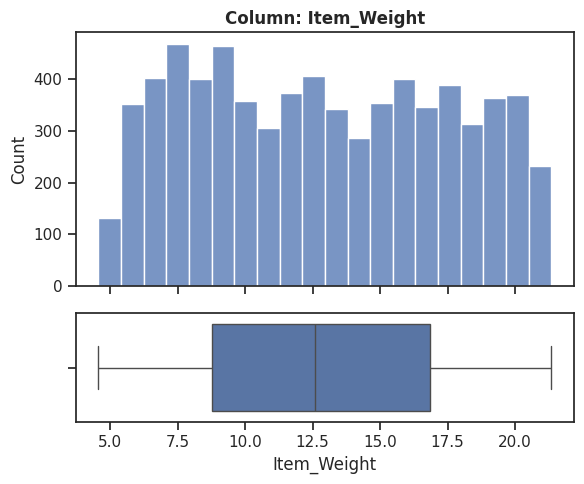

- NaN's Found: 1463 (17.17%)
- Unique Values: 415
- Most common value: 'nan' occurs 1463 times (17.17%)
- Not constant or quasi-constant.


In [40]:
explore_numeric(df,'Item_Weight');

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - numeric

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 1463 null values (17.17%)
  - drop the column

3. Is the feature constant or quasi-constant?
  - No.


4. Would we know this BEFORE the target is determined?
  - Yes.

5. Is there a business case/understanding reason to exclude based on our business case?
  - No.



#### multivariate visualization (feature vs. the target)

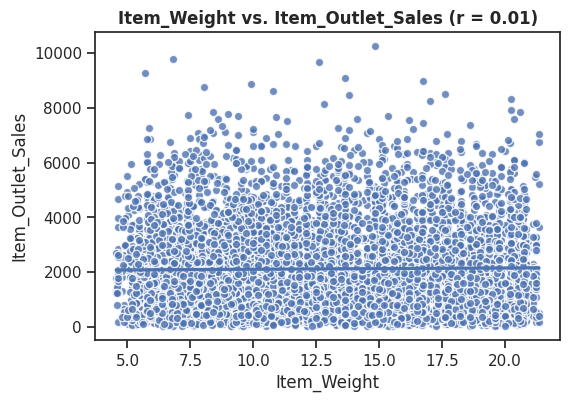

(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Item_Weight vs. Item_Outlet_Sales (r = 0.01)'}, xlabel='Item_Weight', ylabel='Item_Outlet_Sales'>)

In [52]:
plot_numeric_vs_target(df,'Item_Weight')

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes, I think item weight might affect the target.
  - Does this feature appear to be a predictor of the target?
    - no, there is almost no correlation between the variables!

___

### Item fat content
Whether the product is low-fat or regular

####  Univariate visualization

<ipython-input-32-d4c1ca917ec5>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


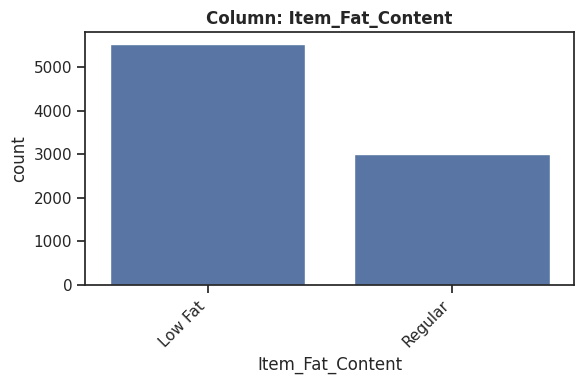

- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: 'Low Fat' occurs 5517 times (64.73%)
- Not constant or quasi-constant.


In [39]:
explore_categorical(df,'Item_Fat_Content');

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - categorical (ordinal)

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 null values (0.0%)
  
3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - 2 unique categories.
  - Not high cardinality (not >10)

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.



#### multivariate visualization (feature vs. the target)

<ipython-input-51-cc92ab443bdd>:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


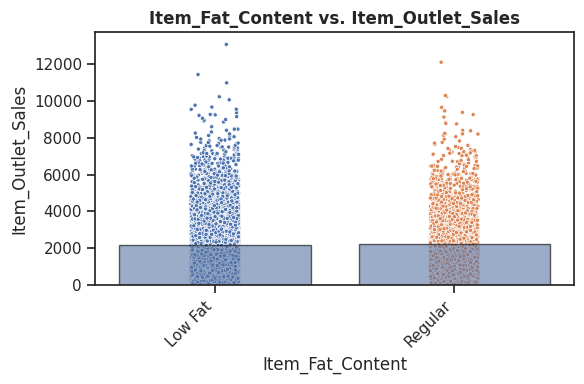

In [54]:
plot_categorical_vs_target(df,'Item_Fat_Content');

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes, I think people may prefer low or regular fat content.
  - Does this feature appear to be a predictor of the target?
    - Yes, low fat seems to have higher price!

___

### Item Visibility
The percentage of total display area of all products in a store allocated to the particular product

#### Univariate visualisation

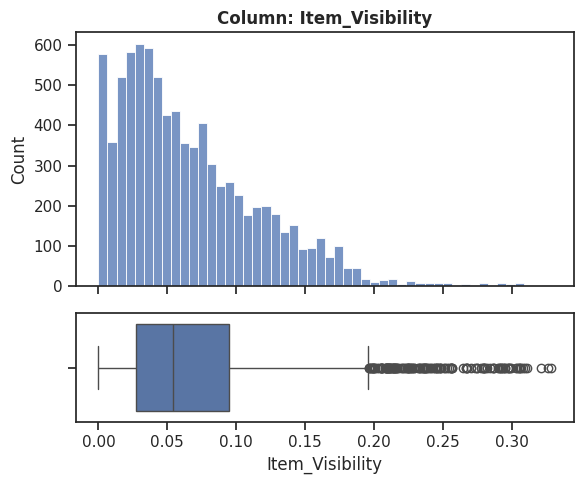

- NaN's Found: 0 (0.0%)
- Unique Values: 7880
- Most common value: '0.0' occurs 526 times (6.17%)
- Not constant or quasi-constant.


In [56]:
explore_numeric(df,'Item_Visibility');

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - numeric

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 null values (0.0%)
  
3. Is the feature constant or quasi-constant?
  - No.

4. Would we know this BEFORE the target is determined?
  - Yes.

5. Is there a business case/understanding reason to exclude based on our business case?
  - No.

#### multivariate visualization (feature vs. the target)

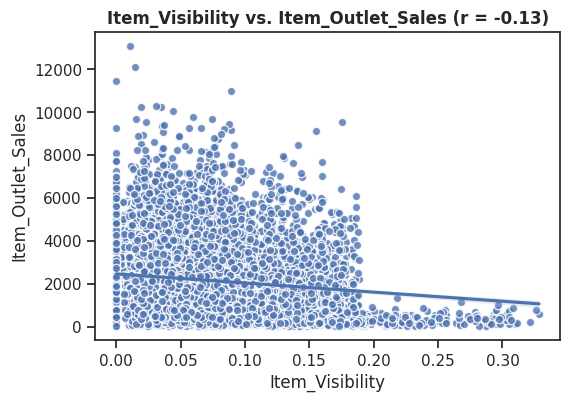

(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Item_Visibility vs. Item_Outlet_Sales (r = -0.13)'}, xlabel='Item_Visibility', ylabel='Item_Outlet_Sales'>)

In [55]:
plot_numeric_vs_target(df,'Item_Visibility')

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes, I think item visibility might affect the target.
  - Does this feature appear to be a predictor of the target?
    - no, there is almost no correlation between the variables!

___

### Item type
The category to which the product belongs

####  Univariate visualization

<ipython-input-32-d4c1ca917ec5>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


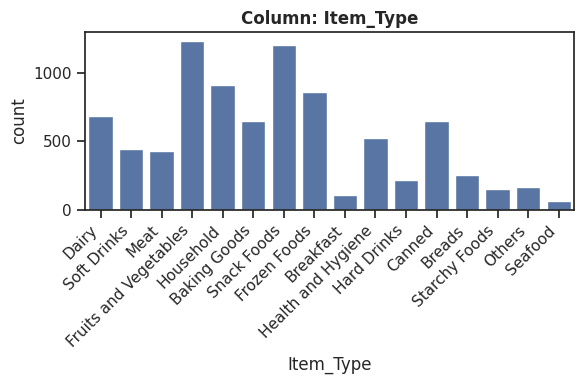

- NaN's Found: 0 (0.0%)
- Unique Values: 16
- Most common value: 'Fruits and Vegetables' occurs 1232 times (14.46%)
- Not constant or quasi-constant.


In [42]:
explore_categorical(df,'Item_Type');

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - categorical (nominal)

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 null values (0.0%)
  
3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - 16 unique categories.
  - high cardinality ( >10)

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.



#### multivariate visualization (feature vs. the target)

<ipython-input-51-cc92ab443bdd>:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


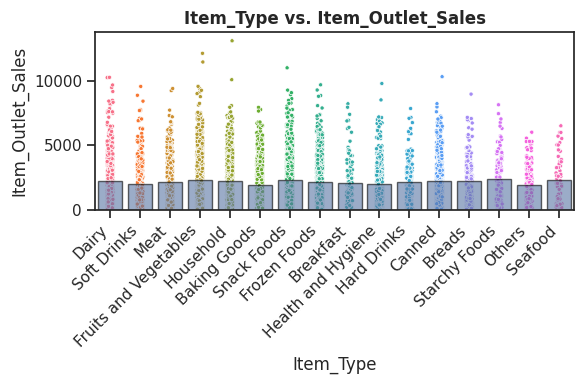

In [58]:
plot_categorical_vs_target(df,'Item_Type');

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes, I think one might be priced higher.
  - Does this feature appear to be a predictor of the target?
    - Yes, some types seem to get a higher price.
___

### Item MRP
Maximum Retail Price (list price) of the product

####  Univariate visualization

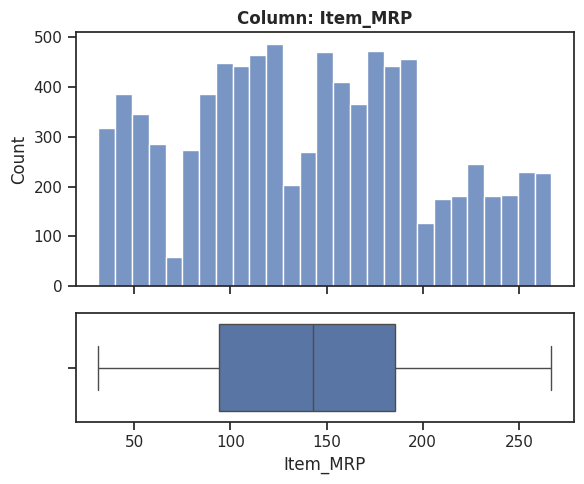

- NaN's Found: 0 (0.0%)
- Unique Values: 5938
- Most common value: '172.0422' occurs 7 times (0.08%)
- Not constant or quasi-constant.


In [43]:
explore_numeric(df,'Item_MRP');

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - numeric

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 null values (0.0%)
  
3. Is the feature constant or quasi-constant?
  - No.

4. Would we know this BEFORE the target is determined?
  - Yes.

5. Is there a business case/understanding reason to exclude based on our business case?
  - No.



#### multivariate visualization (feature vs. the target)

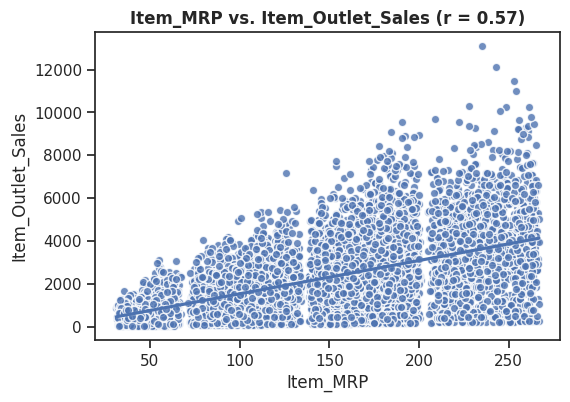

(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Item_MRP vs. Item_Outlet_Sales (r = 0.57)'}, xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>)

In [59]:
plot_numeric_vs_target(df,'Item_MRP')

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes, I think MRP may affect the price.
  - Does this feature appear to be a predictor of the target?
    - Yes,  there is a moderate correlation!

___

### Outlet identifier
Store ID

####  Univariate visualization

<ipython-input-32-d4c1ca917ec5>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


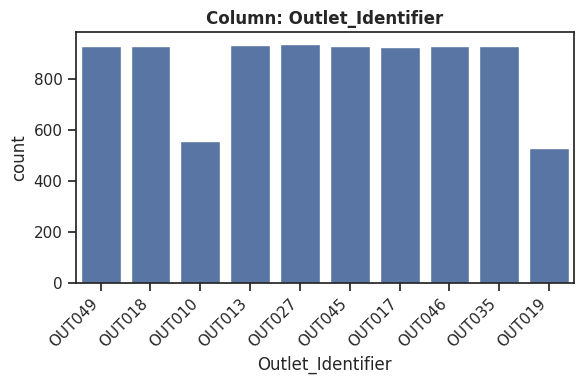

- NaN's Found: 0 (0.0%)
- Unique Values: 10
- Most common value: 'OUT027' occurs 935 times (10.97%)
- Not constant or quasi-constant.


In [44]:
explore_categorical(df,'Outlet_Identifier');

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - categorical (nominal)

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 null values (0.0%)
  
3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - 10 unique categories.
  - high cardinality ( =10)

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.



#### multivariate visualization (feature vs. the target)

<ipython-input-51-cc92ab443bdd>:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


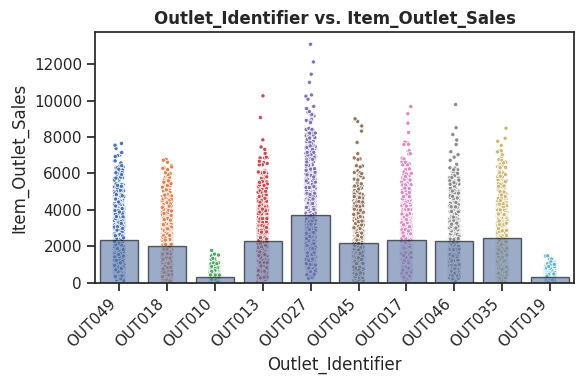

In [61]:
plot_categorical_vs_target(df,'Outlet_Identifier');

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes, I think one might be priced higher.
  - Does this feature appear to be a predictor of the target?
    - Yes, some stores seem to get a higher price.

___

### Outlet Establishment Year
The year in which store was established

####  Univariate visualization

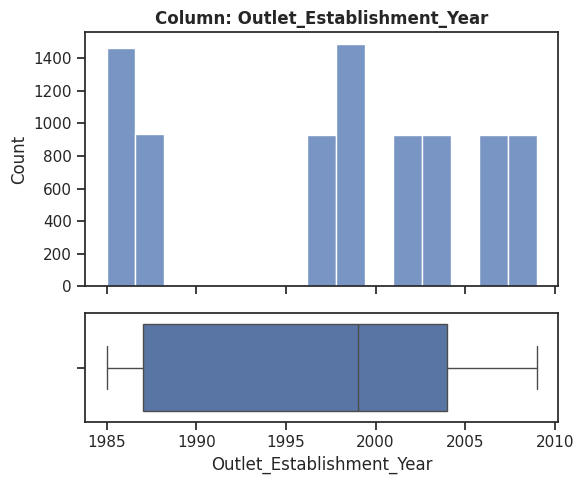

- NaN's Found: 0 (0.0%)
- Unique Values: 9
- Most common value: '1985' occurs 1463 times (17.17%)
- Not constant or quasi-constant.


In [45]:
explore_numeric(df,'Outlet_Establishment_Year');

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - numeric

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 null values (0.0%)
  
3. Is the feature constant or quasi-constant?
  - No.

4. Would we know this BEFORE the target is determined?
  - Yes.

5. Is there a business case/understanding reason to exclude based on our business case?
  - No.



#### multivariate visualization (feature vs. the target)

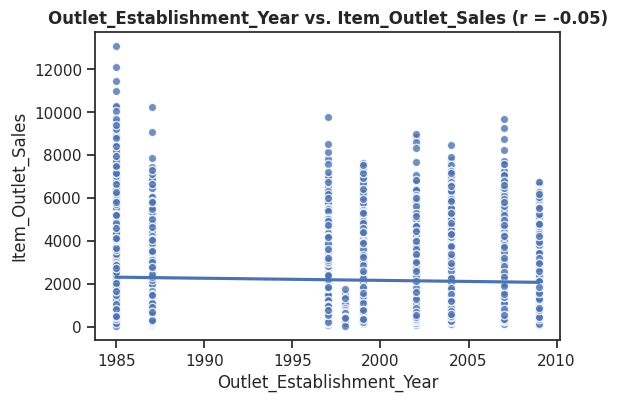

(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Outlet_Establishment_Year vs. Item_Outlet_Sales (r = -0.05)'}, xlabel='Outlet_Establishment_Year', ylabel='Item_Outlet_Sales'>)

In [62]:
plot_numeric_vs_target(df,'Outlet_Establishment_Year')

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes, I think people may prefer newer outlets.
  - Does this feature appear to be a predictor of the target?
    - No, there is no correlation between the variables!

___

### Outlet Size
The size of the store in terms of ground area covered

####  Univariate visualization

<ipython-input-32-d4c1ca917ec5>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


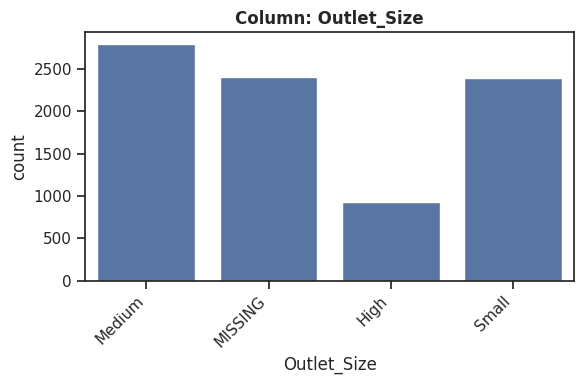

- NaN's Found: 2410 (28.28%)
- Unique Values: 4
- Most common value: 'Medium' occurs 2793 times (32.77%)
- Not constant or quasi-constant.


In [46]:
explore_categorical(df,'Outlet_Size');

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - categorical (ordinal)

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 2410 null values (28.28%)
  - drop the column
  
3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - 3 unique categories.
  -  Not high cardinality (Not >10)

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.



#### multivariate visualization (feature vs. the target)

<ipython-input-51-cc92ab443bdd>:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


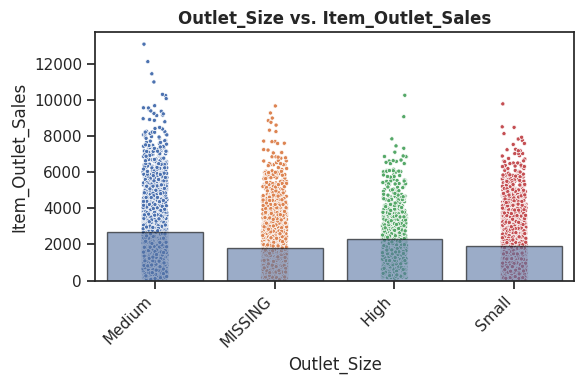

In [64]:
plot_categorical_vs_target(df,'Outlet_Size');

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes, I think one might be priced higher.
  - Does this feature appear to be a predictor of the target?
    - Yes, medium sized outlets seem to get a higher price.

___

### Outlet location type
The type of area in which the store is located

####  Univariate visualization

<ipython-input-32-d4c1ca917ec5>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


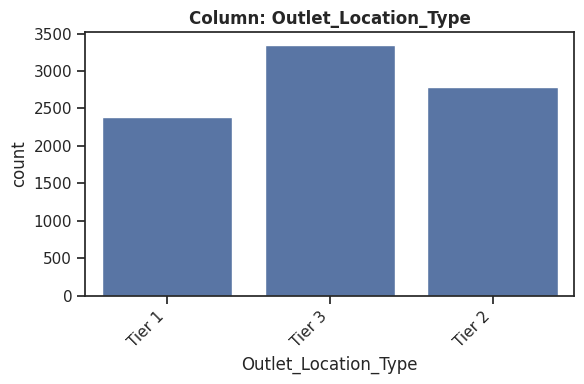

- NaN's Found: 0 (0.0%)
- Unique Values: 3
- Most common value: 'Tier 3' occurs 3350 times (39.31%)
- Not constant or quasi-constant.


In [47]:
explore_categorical(df,'Outlet_Location_Type');

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - categorical (ordinal)

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 null values (0.0%)
  
3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - 3 unique categories.
  -  Not high cardinality (Not >10)

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.



#### multivariate visualization (feature vs. the target)

<ipython-input-51-cc92ab443bdd>:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


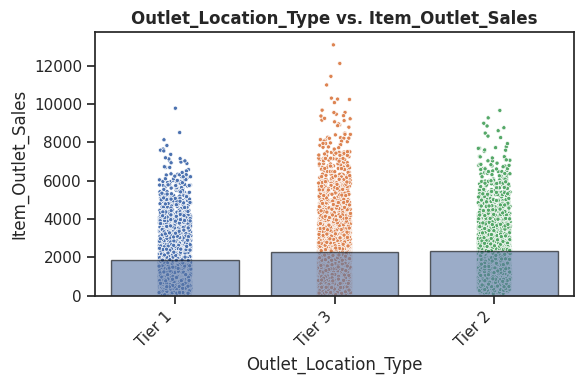

In [66]:
plot_categorical_vs_target(df,'Outlet_Location_Type');

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes, I think one might be priced higher.
  - Does this feature appear to be a predictor of the target?
    - Yes, Tier 3 seem to get a higher price.

___

### Outlet type
Whether the outlet is a grocery store or some sort of supermarket

####  Univariate visualization

<ipython-input-32-d4c1ca917ec5>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


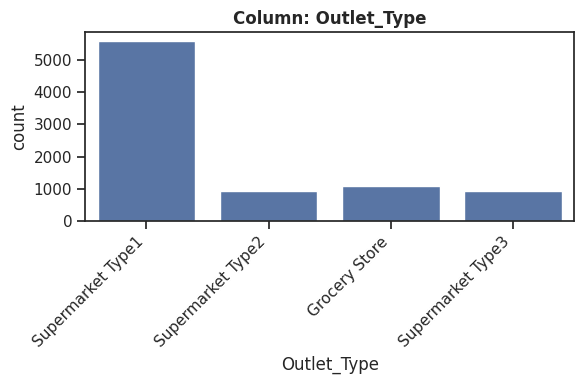

- NaN's Found: 0 (0.0%)
- Unique Values: 4
- Most common value: 'Supermarket Type1' occurs 5577 times (65.43%)
- Not constant or quasi-constant.


In [48]:
explore_categorical(df,'Outlet_Type');

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - categorical (ordinal)

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 null values (0.0%)
  
3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - 4 unique categories.
  - Not high cardinality (Not >10)

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.



#### multivariate visualization (feature vs. the target)

<ipython-input-51-cc92ab443bdd>:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


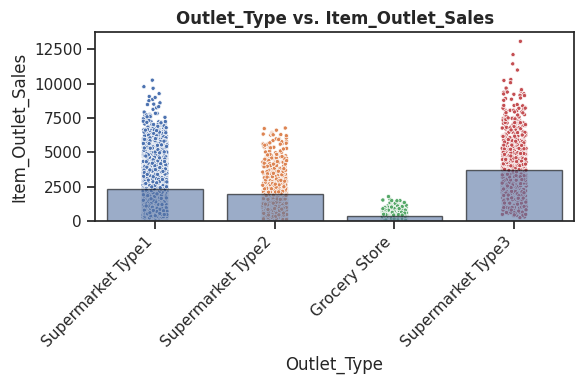

In [68]:
plot_categorical_vs_target(df,'Outlet_Type');

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes, I think one might be priced higher.
  - Does this feature appear to be a predictor of the target?
    - Yes, Supermarket Type3 seem to get a higher price.

___